## How to use the CIFAR-10 dataset
    > curl -O http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
    > tar -xzvf cifar-10-python.tar.gz
    > rm cifar-10-python.tar.gz

In [8]:
import cPickle as pickle
import numpy as np

data_batch_1 = 'cifar-10-batches-py/data_batch_1'

datadict = pickle.load(open(data_batch_1, 'rb'))
X = datadict['data']
print X.shape # prints "(10000, 3072)

(10000, 3072)


As you can see by executing the code above, each data_batch in the `cifar-10-batches-py` directory contains a N x M matrix, where N = 10,000 and M = 3,072.

In this case, N represents the number of pictures in the data_batch, and M represents the number of pixels per picture. Therefore, there are 10,000 images, each of which consist of 3,072 pixels.

In [10]:
image = X[0] # first image in data batch
print image

[ 59  43  50 ..., 140  84  72]


`image` is a 1 x 3072 matrix. How can a 1D matrix (or array) represent a 2D image? If you visit the [CIFAR-10 website](http://www.cs.toronto.edu/~kriz/cifar.html), the Python version of the data has a specific layout:

"data -- a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image."

From the above description, we know that the first 1024 entries of `image` are the red channel values, the next 1024 the green, and the final 1024 the blue. We also know the image is stored in row-major order.

Let's transform the 1 x 3072 matrix into a 3 x 1024 matrix so that rows 0, 1, and 2 represent the red, green, and blue channel values, respectively.

In [11]:
image.reshape(3, 1024)

array([[ 59,  43,  50, ..., 216, 151, 123],
       [ 62,  46,  48, ..., 184, 118,  92],
       [ 63,  45,  43, ..., 140,  84,  72]], dtype=uint8)

The layout description also tells us that each image is 32 x 32 (1024) pixels. An RGB image is composed of 3 images, one image for each of the red, green, and blue channels. See [this Wikipedia entry](https://en.wikipedia.org/wiki/Channel_(digital_image)) for more details. Let's convert the image to a 3 x (32x32) matrix.

In [103]:
rgb_img= image.reshape(3, 32, 32)[0]

The output shows that the image has now been converted to 3 rows of 32x32 matrices. For the sake of visualization, you can imagine this as 3 images, 1 for each channel. However, we'd like to use the `matplotlib` library to show the image. To do this, let's transform the data into a 32x32x3 matrix.

In [101]:
rgb_img = image.reshape(3,32,32).transpose(1,2,0)
# rgb_img[0:16] is the upper half of the image
print rgb_img.shape


(32, 32, 3)


`rgb_img` is a 32x32x3 matrix. Each row represents a row of pixels in the image. Each inner array of 3 elements represents 1 pixel. Each value in the array represents the pixel's red/green/blue channel value. This is a representation that matplotlib will accept.

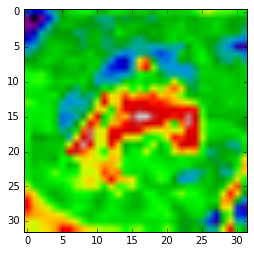

In [106]:
import matplotlib.pyplot as plt
%matplotlib inline

# plt.subplot(2,3,1)
# plt.imshow(rgb_img[:,:,0]).set_cmap('spectral')
# plt.subplot(2,3,2)
# plt.imshow(rgb_img[:,:,1]).set_cmap('spectral')
# plt.subplot(2,3,3)
# plt.imshow(rgb_img[:,:,2]).set_cmap('spectral')
# plt.subplot(2,3,4)
plt.imshow(rgb_img).set_cmap('spectral')
plt.show()

If the code above confuses you, visit [Pyplot tutorial](http://matplotlib.org/users/pyplot_tutorial.html) to learn how to use pyplot and [Image tutorial](http://matplotlib.org/1.3.0/users/image_tutorial.html) to learn how to use matplotlib with images. Refer to [Parts of Figures of pyplot](http://i.imgur.com/GyEiIa9.png) when deciphering pyplot code. Essentially, to show multiple images, use the `subplot` function. The first argument specifies number of rows, the second number of columns, and the third is the index of the subplot. In this case, I've specified 2 rows and 3 columns so that I can fit at most 6 images in the figure. I chose to display the 3 channel values and the image itself. I set the color scheme to spectral, but you can set it to any one of [these](http://matplotlib.org/examples/color/colormaps_reference.html).

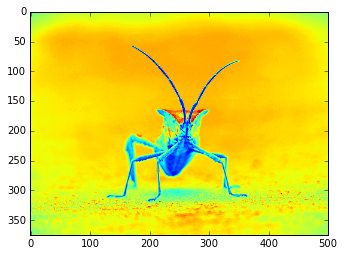

In [111]:
import matplotlib.image as mpimg
img=mpimg.imread('stinkbug.png')
img = img.transpose(2,0,1)[0]
plt.imshow(img)
#imgplot = plt.imshow(img[:,:,1])